# <div style="text-align: center"> Taller 4 </div>  
<div style="text-align: center"> Alejandro Alayón Suárez - 201316083</div>
___

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import numpy as np
import soundfile as sf
import os

### 1. Conceptos básicos de la Transformada Rápida de Fourier

A continuación se puede apreciar la rutina de la transformada rápida de Fourier para un dominio de $L=20$ y con $n$ puntos para una distribución normal dada por:

$f(x)=e^{-x^2}$


In [3]:
L=20
n=128
x2=np.linspace(-L/2,L/2,n+1)
x=x2[0:n]

u=np.exp(-(x**2))
ut=np.fft.fft(u)
utshift=np.fft.fftshift(ut)

En la siguiente celda de código se generan las gráficas 

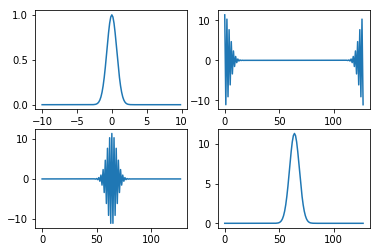

In [4]:
plt.subplot(221)
plt.plot(x,u)
plt.subplot(222)
plt.plot(np.real(ut))
plt.subplot(223)
plt.plot(np.real(utshift))
plt.subplot(224)
plt.plot(np.abs(utshift))
plt.show()

In [5]:
L=20
n=128
x2=np.linspace(-L/2,L/2,n+1)
x=x2[0:n]
dx=x[1]-x[0]
u=1/np.cosh(x)
ut=np.fft.fft(u)
k1=(2*np.pi/(L))*np.linspace(0,(n/2-1),64)
k2=(2*np.pi/(L))*np.linspace((-n/2),-1,64)
k=np.append(k1,k2)

ut1=1j*ut*k
ut2=-k*k*ut
u1=np.real(np.fft.ifft(ut1))
u2=np.real(np.fft.ifft(ut2))
u1exact=(-1/np.cosh(x))*np.tanh(x)
u2exact=(1/np.cosh(x))-2*((1/np.cosh(x))**3)

ux=[]
ux=np.append(ux,(-3*u[0]+4*u[1]-u[2])/(2*dx))
for i in range(1,n-1):
    ux=np.append(ux,(u[i+1]-u[i-1])/(2*dx))
ux=np.append(ux,(3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx))    

ux2=[]
ux2=np.append(ux2,(-3*u[0]+4*u[1]-u[2])/(2*dx))
ux2=np.append(ux2,(-3*u[1]+4*u[2]-u[3])/(2*dx))
for i in range(2,n-2):
    ux2=np.append(ux2,(-u[i+2]+8*u[i+1]-8*u[i-1]+u[i-2])/(12*dx))
ux2=np.append(ux2,(3*u[n-2]-4*u[n-3]+u[n-4])/(2*dx))
ux2=np.append(ux2,(3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx))



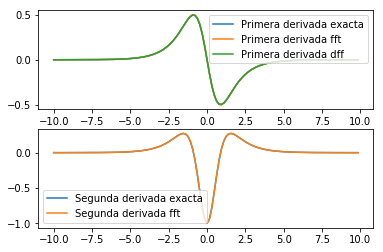

In [6]:
plt.subplot(211)
plt.plot(x,u1exact,label='Primera derivada exacta')
plt.plot(x,u1,label='Primera derivada fft')
plt.plot(x,ux,label='Primera derivada dff')
plt.legend()
plt.subplot(212)
plt.plot(x,u2exact,label='Segunda derivada exacta')
plt.plot(x,u2,label='Segunda derivada fft')
plt.legend(loc='lower left')
plt.show()

In [134]:
L=30
n=512
t2=np.linspace(-L,L,n+1)
t=t2[0:n]
k1=(2*np.pi/(2*L))*np.linspace(0,(n/2-1),256)
k2=(2*np.pi/(2*L))*np.linspace((-n/2),-1,256)
k=np.append(k1,k2)
u=(1/np.cosh(t))
noise=10
ut=np.fft.fft(u)
unt=ut+noise*(np.random.rand(n)+1j*np.random.rand(n))
un=np.fft.ifft(unt)
un[0]=0.2
filt=np.exp(-0.1*(k**2))
unft=filt*unt
unf=np.fft.ifft(unft)

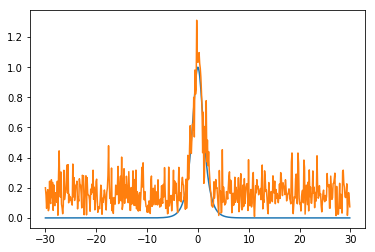

In [8]:

plt.plot(t,u)
plt.plot(t,np.abs(un))
plt.show()

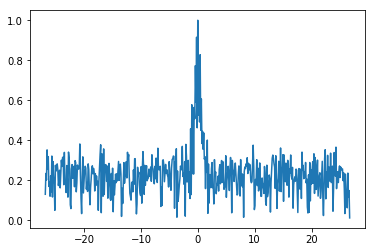

In [9]:
plt.plot(np.fft.fftshift(k),np.abs(np.fft.fftshift(unt))/max(np.abs(np.fft.fftshift(unt))))
plt.show()

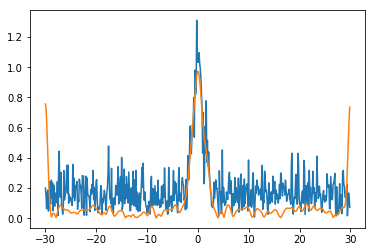

In [10]:
plt.plot(t,np.abs(un))
plt.plot(t,np.abs(unf))
plt.show()

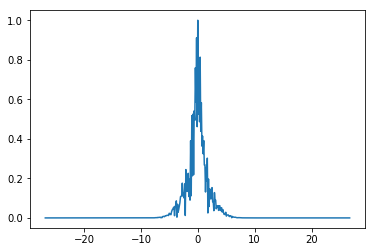

In [11]:
plt.plot(np.fft.fftshift(k),np.abs(np.fft.fftshift(unft))/max(np.abs(np.fft.fftshift(unft))))
plt.show()

In [61]:

import wave
import sys
spf=wave.open('sample.wav.wav','r')

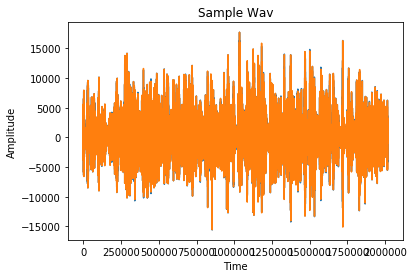

In [149]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

# read audio samples
input_data = read("sample.wav.wav")
audio = input_data[1][16608000:18624000]
# plot the first 1024 samples
plt.plot(audio)
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav")
# display the plot
plt.show()

In [92]:
len(input_data[1])
len(input_data[1])/48000


459.69195833333333

In [ ]:
n = len(audio)
timestep = 1/48000
W = np.fft.fftfreq(n, d=timestep)
f_signal = np.fft.fftpack.rfft(audio)

plt.plot(W,np.abs(f_signal))
plt.show()

cut_f_signal = f_signal.copy()

filt=np.exp(-0.5*(W)**2)
a=cut_f_signal[:,0]*filt
b=cut_f_signal[:,1]*filt
c= np.column_stack((a,b))

cut_signal =  np.fft.fftpack.irfft(cut_f_signal)


C:\Users\Alejandro\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


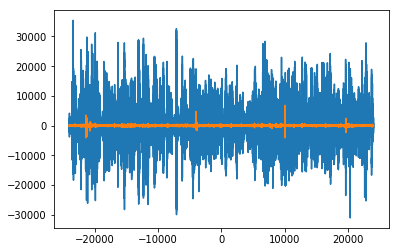

array([[ -988.+0.j,   -24.+0.j],
       [ -944.+0.j,   -40.+0.j],
       [ -836.+0.j,   -24.+0.j],
       ..., 
       [ 1879.+0.j,    51.+0.j],
       [ 1553.+0.j,    53.+0.j],
       [ 1107.+0.j,    53.+0.j]])

In [221]:
plt.plot(W,cut_f_signal)
plt.show()
cut_f_signal

In [ ]:
plt.plot(audio)
plt.plot(cut_signal)
plt.show()

In [228]:
sp.io.wavfile.write('2.wav', 48000, audio)